In [2]:
# -*- coding: utf-8 -*-
# import
import receiving_n_transforming_data as rtd
import dimensionality_reduction as drf
import classification as cls
print(rtd.func_list__)

['train_test_split', 'classification_report', 'confusion_matrix', 'accuracy_score', 'read_data_xlsx', 'lemmatize', 'del_stop_words', 'document_term_matrix', 'choce_from_data', 'reshape_testdata']


In [3]:
data = rtd.read_data_xlsx("data.xlsx")
name_tf_idf, annotation_tf_idf, labels = rtd.choce_from_data(data=data, tf_idf=True)     # Получение tf-idf матрицы для названий и аннотаций
# name_tf_idf, annotation_tf_idf    - списки [матрица документ-термин, термины]
# name_tf_idf = name_tf_idf[0]
# annotation_tf_idf = annotation_tf_idf[0]

In [4]:
# Проверяем сбалансированность выборки
print("Количество текстов по теме ИАД", labels.count(True))
print("Количество текстов по теме не ИАД", labels.count(False))

Количество текстов по теме ИАД 1583
Количество текстов по теме не ИАД 1836


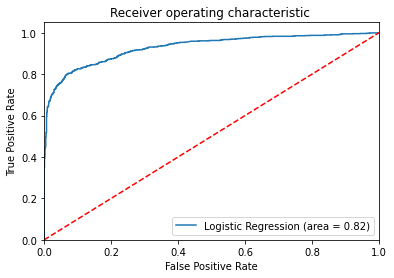

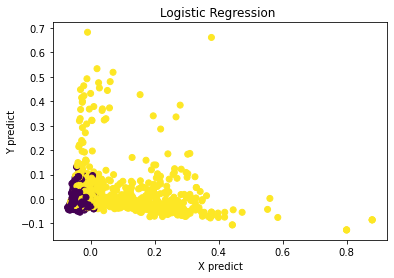

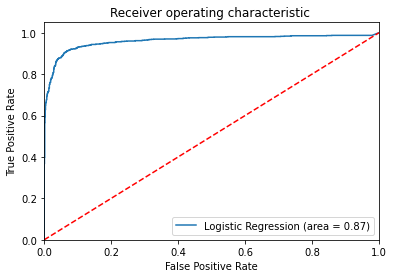

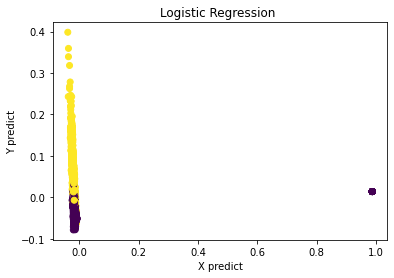

In [4]:
from sklearn.model_selection import train_test_split

file = open("Классификация без удаления малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

In [62]:
# Получение сокращенных матриц без файлов
df_name_tf_idf_short = drf.dimensionality_reduction_func(name_tf_idf)
df_annotation_tf_idf_short = drf.dimensionality_reduction_func(annotation_tf_idf)
name_tf_idf_short, terms_by_name = drf.df_to_list(df_name_tf_idf_short)
annotation_tf_idf_short, terms_by_annatation = drf.df_to_list(df_annotation_tf_idf_short)
# del df_name_tf_idf_short, df_annotation_tf_idf_short

In [5]:
# Получение матриц сокращенной размерности и терминов к матрицам ищ файлов
name_tf_idf_short, terms_by_name_short = drf.read_dimData_fromFiles(tf_idf_file="name_tf_idf_short.txt", terms_file="terms_by_name_short.txt")
annotation_tf_idf_short, terms_by_annatation_short = drf.read_dimData_fromFiles(tf_idf_file="annotation_tf_idf_short.txt", terms_file="terms_by_annatation_short.txt")

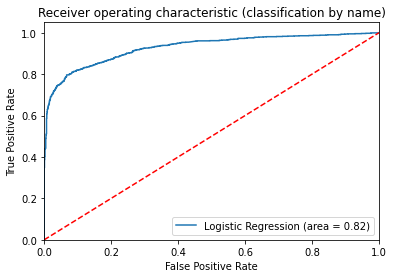

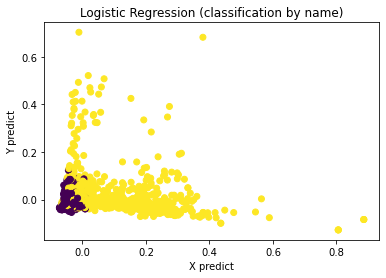

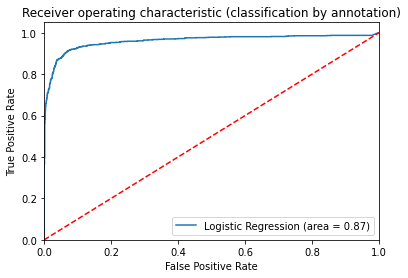

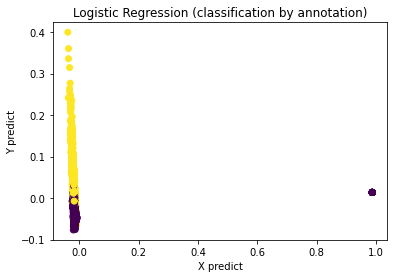

In [64]:
# Классификация c логистической регрессией с удалением малозначимых терминов// с графиками

from sklearn.model_selection import train_test_split

file = open("Классификация с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test, "(classification by name)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test, "(classification by annotation)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

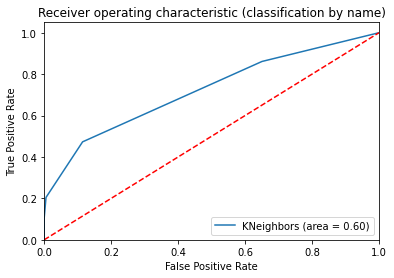

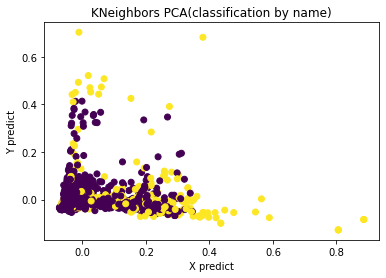

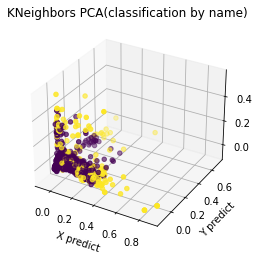

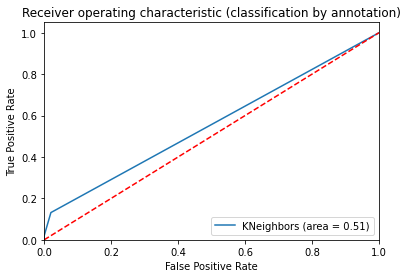

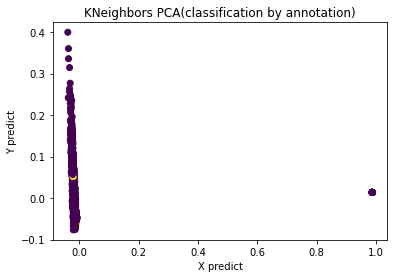

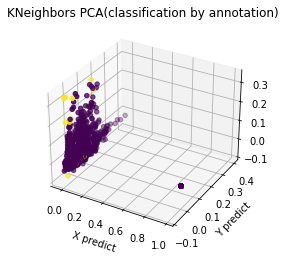

In [96]:
# Классификация c КБС регрессией с удалением малозначимых терминов// с графиками

from sklearn.model_selection import train_test_split

file = open("Классификация КБС с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train, x_test, y_train, y_test, "(classification by name)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)
classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train, x_test, y_train, y_test, "(classification by annotation)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()